# Question
Train a logistic regression model on a given diagnostic dataset (dataset from kaggle) and evaluate its performance by calculating the accuracy of the model on a test set.

1. Model Evaluation: In addition to accuracy, find other performance metrics like precision, recall, F1-score, or ROC-AUC and plot confusion matrices or ROC curves to see the model performance.
2. Hyperparameter Tuning: Use techniques such as cross-validation or grid search to optimize the model’s parameters and then check model performance again and see if there is any improvement in model’s accuracy. 
3. Analyse feature importance or coefficients to understand which features are driving the predictions.

Hint: Refer the following documents: 
classification2_binary.ipynb, 
Telco-Customer-Churn.csv

For diagnostic dataset: Refer Kaggle https://www.kaggle.com/datasets, 
Sample dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data (You can work n his one or a similar one)


Reference: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20in%20Python%20-%20Step%20by%20Step.ipynb

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
df['benign_0__mal_1'].value_counts()

benign_0__mal_1
1    357
0    212
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=df[['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension',
      'worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']]

In [8]:
y=df['benign_0__mal_1']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr=LogisticRegression()

In [12]:
lr.fit(x_train,y_train)

D:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred=lr.predict(x_test)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,roc_auc_score

In [15]:
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
print('accuracy_score',accuracy_score(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_pred))

precision_score 0.9459459459459459
recall_score 0.9859154929577465
f1_score 0.9655172413793104
accuracy_score 0.956140350877193
roc_auc_score 0.9464461185718965


In [17]:
import matplotlib.pyplot as plt

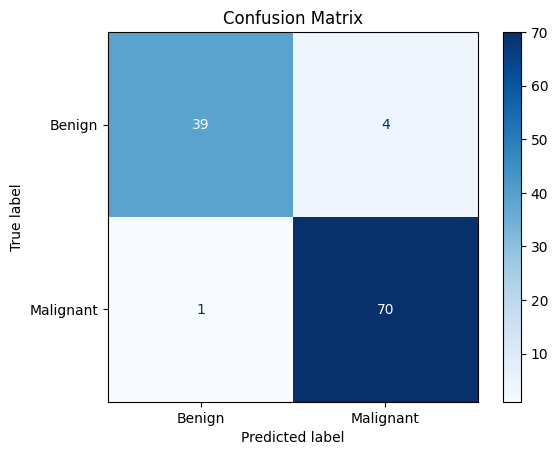

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

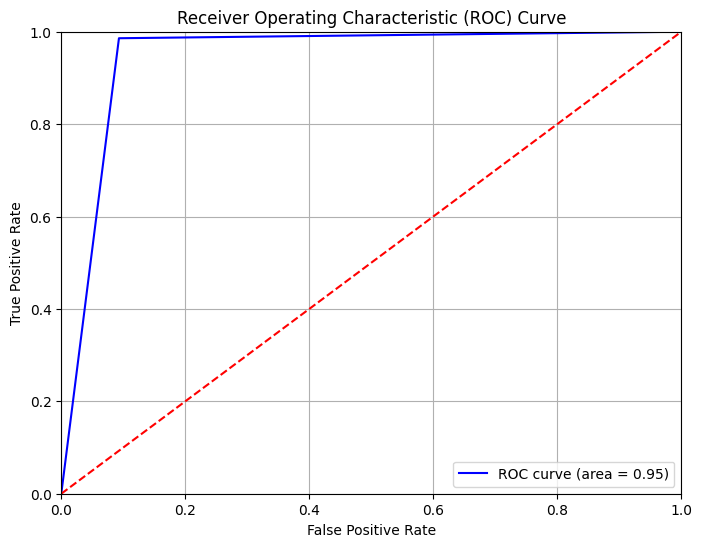

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter=10000)
# Perform cross-validation
cv_scores = cross_val_score(lr, x_train, y_train, cv=100)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))


Cross-validation scores: [1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.8  1.   0.8
 1.   1.   0.8  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   0.6  0.6  1.   1.   1.   1.   1.   1.   0.8  1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.8  1.   0.8  1.   1.
 1.   1.   1.   1.   1.   0.75 1.   0.75 1.   0.75 1.   1.   1.   1.
 1.   1.   1.   1.   1.   0.75 1.   1.   1.   0.75 1.   1.   0.5  1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   0.75 0.5  0.75 1.   1.
 1.   1.  ]
Mean CV score: 0.9525
Standard deviation of CV scores: 0.11277743568639961


In [21]:
import warnings
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       
    'penalty': ['l1', 'l2'],            
    'solver': ['liblinear', 'saga']
}
# Perform grid search to tune hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
grid_search.fit(x_train, y_train)
# Best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-pac

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
# Train a new Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(
    C=best_params['C'], 
    penalty=best_params['penalty'], 
    solver=best_params['solver'], 
    max_iter=1000
)
# Fit the model on the training data
best_model.fit(x_train, y_train)
# Make predictions on the test data
y_pred_best = best_model.predict(x_test)
# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the model with tuned hyperparameters: {accuracy * 100:.2f}%")

Accuracy of the model with tuned hyperparameters: 97.37%


In [26]:
feature_importance = best_model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df) 

                    Feature  Importance
5          mean compactness   57.358072
6            mean concavity    8.205880
0               mean radius    0.636198
2            mean perimeter    0.090740
11          worst perimeter    0.086982
3                 mean area    0.002369
8             mean symmetry    0.000000
16     worst concave points    0.000000
9    mean fractal dimension    0.000000
18  worst fractal dimension    0.000000
12               worst area   -0.027398
10            worst texture   -0.102454
1              mean texture   -0.319334
15          worst concavity   -4.873265
14        worst compactness   -5.975854
17           worst symmetry  -10.044503
4           mean smoothness  -10.826257
13         worst smoothness  -12.851786
7       mean concave points -175.405288
